## Observations and Insights 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
mouse_combine = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID"])
mouse_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
mouse_combine.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [15]:
# print check total data
#print(mouse_metadata)
#print("======================")
#print(study_results)
#print("======================")
#print(treatment_data)
#print(treatment_data).describe()

In [31]:
# Checking the number of mice in the DataFrame.
mouse_check = mouse_combine["Mouse ID"].value_counts()
mouse_check

g989    13
g791    10
c758    10
l509    10
k403    10
        ..
n482     1
u153     1
o848     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = mouse_combine.loc[mouse_combine.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()



In [18]:
duplicate_mouse_id

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_combine.loc[mouse_combine["Mouse ID"]=="g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data_complete = mouse_combine[mouse_combine['Mouse ID'].isin(duplicate_mouse_id)==False]
clean_study_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_study_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = clean_study_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = clean_study_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sds = clean_study_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = clean_study_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table = pd.DataFrame({"Tumor Volume Mean":means,
                              "Tumor Volume Median":medians,
                              "Tumor Volume Variance": variances,
                              "Tumor Volume Standard Deviation":sds,
                              "Tumor Volume Standard Error Mean":sems})

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#means,medians,variances,sds,sems
summary_table

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

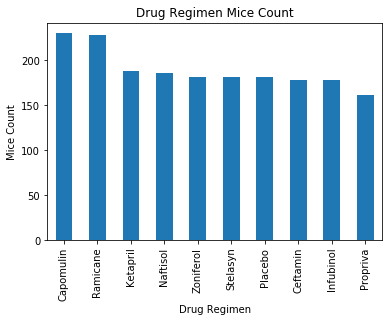

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
df1 =mouse_combine["Drug Regimen"].value_counts()
#df1.plot as a bar and set labels to then use plt show
df1.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Drug Regimen Mice Count")
plt.show()

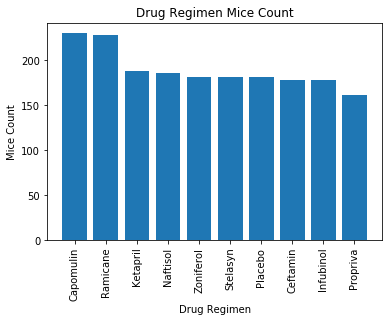

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(df1.index.values,df1.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.title("Drug Regimen Mice Count")
plt.show()


## Pie Plots

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#create a new df to count Sex of mouse
gender_df = pd.DataFrame(mouse_combine.groupby(["Sex"]).count()).reset_index()
gender_df.head()
# redo gender_df to just show the sex and count
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Total Count"})
gender_df.head()



,Sex,Total Count
0,Female,935
1,Male,958


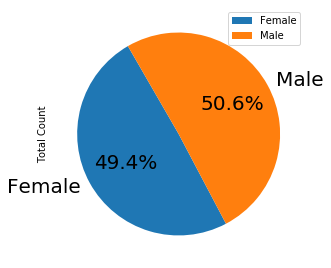

In [27]:
# plt as pie and set axis with subplots use shift tab to see
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Total Count", ax=ax1, autopct='%1.1f%%', 
 startangle=120, shadow=False, labels=gender_df['Sex'], legend = True, fontsize=20)

([<matplotlib.patches.Wedge at 0x2764205bb48>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

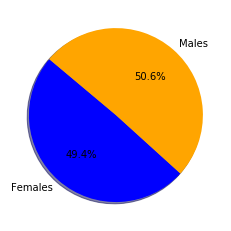

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create gender count with a groupby of sex and age months
gender_count = (mouse_combine.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count
# create labels
labels = ["Females", "Males"]

# set colors
colors = ["blue", "orange"]
# split with explode 
explode = (0, 0)
#crate ply plot with gender count labels colors and explode
plt.pie(gender_count, labels=labels, colors=colors, explode=explode,autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 are possible outliers.
Values above 51.83201549 are possible outliers.


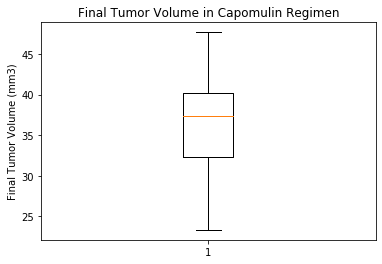

In [58]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_combine

# Sort data via drug mouse and timepoint
sorted_df = mouse_combine.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Select volume final
max_df = sorted_df.loc[sorted_df["Timepoint"] ==45]
max_df.head().reset_index()

# Select data for Capomulin 
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

# Convert column drug regimen df
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]
cap_list

# quartile calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#set bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")
# outlier plot of final total volume
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 are possible outliers.
Values above 49.79900043124999 are possible outliers.


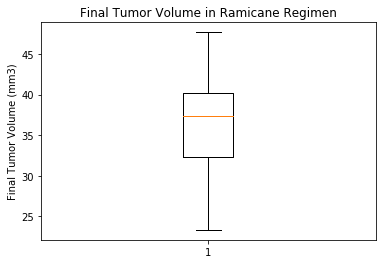

In [59]:
# re do same code from above to find turmor volume for each drug regimen

# Select data for Ramicane
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

# Convert column drug regimen df
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]
ram_list


# quartile calculation
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#set bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

# outlier plot of final total volume per ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 are possible outliers.
Values above 75.08224443499999 are possible outliers.


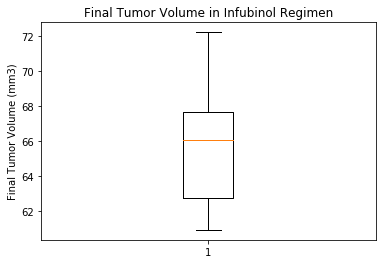

In [61]:
# Select data for Infubinol regimen 
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()


# Convert column drug regimen df
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]
inf_list

# quartile calculations
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#set bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 are possible outliers.
Values above 76.66786758 are possible outliers.


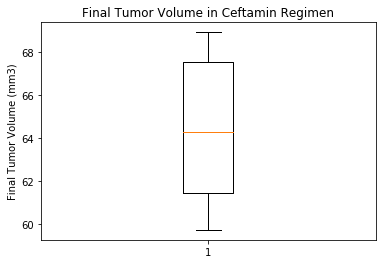

In [66]:
# Select data for Ceftamin regimen
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()


# Convert column drug regimen df
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]
cef_list

# quartile calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#set bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are possible outliers.")
print(f"Values above {upper_bound} are possible outliers.")

# outlier plot of final total volumes
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest see above


## Line and Scatter Plots

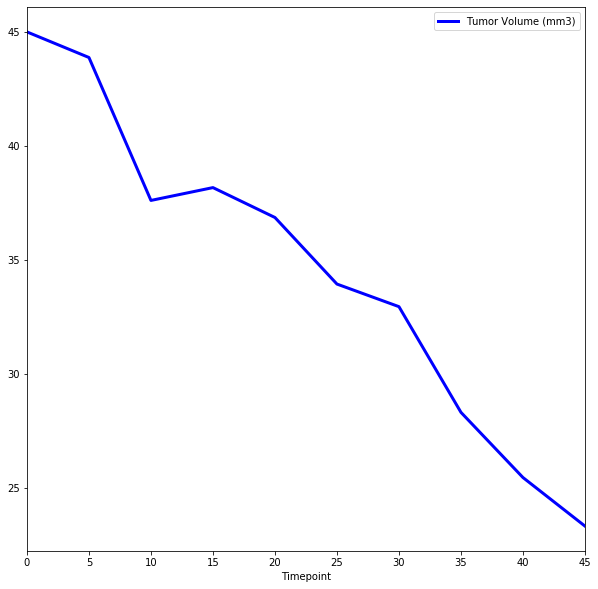

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# new df for Capomulin 
capomulin_df = mouse_combine.loc[mouse_combine["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()
#print capomulin_df and see single mouse id # to then select

# select a mouse and crate another df
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_df.index

#.plot and set 
cap_single_df.set_index('Timepoint').plot(figsize=(10, 10), linewidth=3, color='blue')

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df.head()

#create a new df for mouse id, weight, and average tumore volume per Capomulin regimne
newcap_df = capomulin_df.loc[:, ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
newcap_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [82]:
# average tumor volume for the Capomulin regimen
avg_cap = pd.DataFrame(newcap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [83]:
# rename the Avg_cap Tumor Volume to Average Volume to then graph
avg_cap = avg_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_cap.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


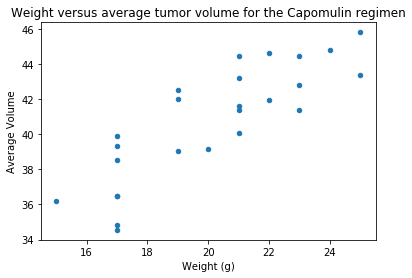

In [88]:
#set an index for Mouse ID and create a scatter plot of single mouse vs average per capomulin drug regimen
avg_cap.plot(kind="scatter", x="Weight (g)", y= "Average Volume", 
             title = "Weight versus average tumor volume for the Capomulin regimen")

plt.show()

## Correlation and Regression

In [108]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_cap.head()

mouse_weight = avg_cap.iloc[:,0]
#print(mouse_weight)

avg_tumor_volume = avg_cap.iloc[:,1]
#print(avg_tumor_volume)

print(f"The correlation coefficient between mouse weight and average tumor volume is{round(st.pearsonr(mouse_weight,avg_tumor_volume)[0],2)}")


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
# Observations about data 
# The drug Capomulin was the best treatment regimen for mice to decrease its tumor volume, due to having the best summary statistics results.
# Capomulin was the most used treatment regimen, where the slight majoity of tested mice were male at 50.6% but overall where almost even between both sexes of mice.
# Note that the higher the weight(g) of mouse the larger the average volume tumor size in the weight versus average tumor volume for the Capomulin regimen study.